<a href="https://colab.research.google.com/github/raminass/Software-Project/blob/main/strings%2BdynamicMemory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Strings

```c
char *p = "abcde" vs. char s[] = "abcde"
```

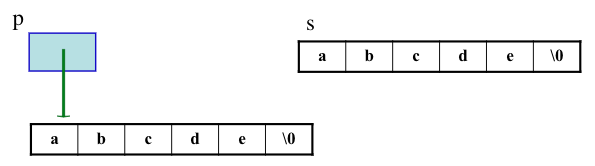

## Example 1

```c
char *p = “abcde”
printf( “%s %s\n”, p, p +1 );

char s[] = “abcde”
/*	is equivalent to: */
char s[] = {‘a’, ‘b’, ‘c’, ‘d’, ‘e’, ‘\0’};


```c
#include <stdio.h>

int main() {
    char *p = "abcde";
    printf("%s\n", p); /* Prints: abcde*/
    p[0] = 'x';      /* Undefined behavior! Segmentation fault.*/
    printf("%s\n", p);
    return 0;
}
```

```c
#include <stdio.h>

int main() {
    char s[] = "abcde";
    printf("%s\n", s); // Prints: abcde
    s[0] = 'x';        // Modifies the array.
    printf("%s\n", s); // Prints: xbcde
    return 0;
}
```

In [ ]:
# @title
%%writefile tmp.c
#include <stdio.h>
#include <ctype.h>

int word_cnt(char *s);

int main()
{
    char str[100];

    printf("Enter a string: ");
    fgets(str, sizeof(str), stdin);

    int count = word_cnt(str);

    printf("The string contains %d words.\n", count);

    return 0;
}

int word_cnt(char *s)
{
    int cnt = 0;
    while (*s != '\0')
    {
        while (isspace(*s))
            ++s;
        if (*s != '\0')
        {
            ++cnt;
            while (!isspace(*s) && *s != '\0')
                ++s;
        }
    }
    return cnt;
}

In [ ]:
# @title
!gcc tmp.c -o tmp
!./tmp

## Strings in the standard library

The `<string.h>` library provides functions for handling and manipulating strings in C.

```c
#include <string.h>

char *strcat(char *s1, const char *s2);

int strcmp(const char *s1, const char *s2);

char *strcpy(char *s1, const char *s2);

unsigned strlen(const char *s);
```

## An implementation example (1)

```c
unsigned strlen(const char *s)
{
    int n = 0;

    for (; *s != '\0'; ++s)
        ++n;
    return n;
}
```

In [ ]:
# @title
%%writefile tmp.c
#include <stdio.h>
#include <string.h>
int main()
{

    char s[] = "Hello";
    unsigned len = strlen(s);
    printf("The length of the string is: %u\n", len);
    return 0;
}


In [ ]:
# @title
!gcc tmp.c -o tmp
!./tmp

## An implementation example (2)

```c
char *strcat(char *s1, const char *s2)
{
    char *p = s1;

    while (*p)
        ++p;

    while (*p++ = *s2++);

    return s1;
}
```

**Why Return s1?**

## String permutations

Goal: print all permutations of a given string.

Example: “ABC” -> ABC,ACB,BAC,BCA,CAB,CBA

Can you think of a recursive solution?


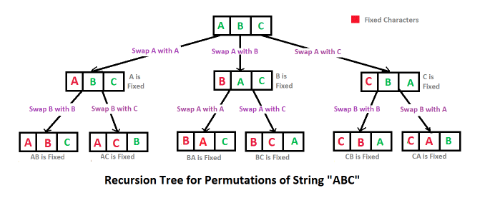

## Implementation (swap)

```c
void swap(char *x, char *y)
{
    char temp;
    temp = *x;
    *x = *y;
    *y = temp;
}
```

## Implementation (recursion)

```c
void permute(char *a, int l, int r)
{
    int i;
    if (l == r)
        printf("%s\n", a);
    else
    {
        for (i = l; i <= r; i++)
        {
            swap((a + l), (a + i));
            permute(a, l + 1, r);
            swap((a + l), (a + i)); // backtrack
        }
    }
}
```

## Ragged Arrays

```c
    char a[2][15] = {"abc:", "a is for apple"};
    char *p[2] = {"abc:", "a is for apple"};

    printf("%c%c%c %s %s\n%c%c%c %s %s\n",
           a[0][0],
           a[0][1], a[0][2], a[0], a[1], p[0][0], p[0][1], p[0][2], p[0], p[1]);

```

In [ ]:
# @title
%%writefile tmp.c
#include <stdio.h>
int main(void)
{
    char a[2][15] = {"abc:", "a is for apple"};
    char *p[2] = {"abc:", "a is for apple"};

    printf("%c%c%c %s %s\n%c%c%c %s %s\n",
           a[0][0],
           a[0][1], a[0][2], a[0], a[1], p[0][0], p[0][1], p[0][2], p[0], p[1]);
    return 0;
}


In [ ]:
# @title
!gcc -o tmp tmp.c
!./tmp

# Dynamic memory allocation

Imagine you're designing a text editor like Notepad:

A user starts with an empty file.
As they type, the text grows beyond the initial memory allocated.

* #include <stdlib.h>
* Functions work with void * - should cast  to required type
* return NULL on failure – needs checking
* size_t is typically unsigned int

```c
void *calloc(size_t num, size_t size);
/*all allocated bytes are initialized to zero*/

void *malloc(size_t size);
/*no initialization*/

void *realloc( void *ptr, size_t new_size )
/*The contents will be unchanged in the range from the start of the region up to the minimum of
the old and new sizes. If the new size >  the old size, the added memory will not be initialized.*/

void free( void *ptr )
```



### Key Differences: `malloc` vs `calloc`

| **Feature**            | **`malloc`**                              | **`calloc`**                                |
|-------------------------|-------------------------------------------|---------------------------------------------|
| **Initialization**      | Memory is **not initialized**.           | Memory is **initialized to 0**.            |
| **Parameters**          | Takes a single argument (`size`).        | Takes two arguments (`num` and `size`).    |
| **Purpose**             | General-purpose memory allocation.       | Suitable for allocating and initializing arrays. |
| **Performance**         | Faster, as it skips clearing memory.     | Slightly slower, due to memory initialization. |
| **Function Signature**  | `void* malloc(size_t size);`             | `void* calloc(size_t num, size_t size);`   |

---

### Example:

#### Using `malloc`:
```c
int *arr = (int *)malloc(5 * sizeof(int)); // Allocates memory for 5 integers
```

#### Using `calloc`:
```c
int *arr = (int *)calloc(5, sizeof(int)); // Allocates and initializes memory for 5 integers
```

---

### Summary:
- Use **`malloc`** when performance is critical, and you’ll initialize the memory manually.
- Use **`calloc`** when you need zero-initialized memory (e.g., arrays).

## Lexicographical sort

```c
int main(void)
{
	char   *w[N];
	char   word[MAXWORD];
	int    n = 0, i = 0;

	for ( i = 0; scanf("%s", word) == 1; ++i )
	{
		if ( i >= N ) {
		      printf( “Sorry, at most %d words can be sorted.”, N );
		      exit(1);
		}
		w[i] = (char *)calloc(strlen(word) + 1, sizeof(char));
		assert(w[i]!=NULL);
		strcpy(w[i], word);
	}
```

In [ ]:
# @title
%%writefile tmp.c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <assert.h>

#define N 5
#define MAXWORD 100
void sort_words(char *w[], int n);
void swap(char **p, char **q);
int main(void)
{
    char *w[N];
    char word[MAXWORD];
    int n = 0, i = 0;

    for (i = 0; scanf("%s", word) == 1; ++i)
    {
        if (i >= N)
        {
            printf("Sorry, at most % d words can be sorted.", N);
            exit(1);
        }
        w[i] = (char *)calloc(strlen(word) + 1, sizeof(char));
        assert(w[i] != NULL);
        strcpy(w[i], word);
    }
    n = i;
    sort_words(w, n);
    printf("In sorted order:\n");
    for (i = 0; i < n; ++i)
    {
        printf("%s\n", w[i]);
        free(w[i]);
    }
    return 0;
}
void sort_words(char *w[], int n)
{
    int i = 0, j = 0;
    for (i = 0; i < n; ++i)
        for (j = i + 1; j < n; ++j)
            if (strcmp(w[i], w[j]) > 0)
                swap(&w[i], &w[j]);
}

void swap(char **p, char **q)
{
    char *temp = NULL;
    temp = *p;
    *p = *q;
    *q = temp;
}


In [ ]:
# @title
!gcc -o tmp tmp.c
!./tmp

# Multidimensional Arrays

```c
int a[5][2] = {{1, 2}, {3, 4}, {5, 6}, {7, 8}, {9, 10}};

int sum(int a[][2])
{
    int i = 0, j = 0, sum = 0;

    for (i = 0; i < 5; ++i)
        for (j = 0; j < 2; ++j)
            sum += a[i][j];
    return sum;
}

```

```c
int a[5][2]={{1,2},{3,4},{5,6},{7,8},{9,10}};

a[i][j] is equivalent to *(&a[0][0]+2*i+j)
What is **(a+3) ?
What is *(a[2]+1) ?
```

How can we allocate a dynamic 2D array?


In [ ]:
# @title
%%writefile tmp.c
#include <stdio.h>

int main() {
    int a[5][2] = {
        {1, 2},
        {3, 4},
        {5, 6},
        {7, 8},
        {9, 10}
    };

    // Demonstrating **(a + 3)
    int result1 = **(a + 3); // Access the first element of the 4th row
    printf("**(a + 3) = %d\n", result1);

    // Demonstrating *(a[2] + 1)
    int result2 = *(a[2] + 1); // Access the second element of the 3rd row
    printf("*(a[2] + 1) = %d\n", result2);

    // Verifying using direct indexing
    printf("a[3][0] = %d (should match **(a + 3))\n", a[3][0]);
    printf("a[2][1] = %d (should match *(a[2] + 1))\n", a[2][1]);

    return 0;
}


In [ ]:
# @title
!gcc -o tmp tmp.c
!./tmp

## Dynamic matrix allocation (I)

```c
int **a;

a = calloc(n, sizeof(int *));
for (i = 0; i < n; i++)
    a[i] = calloc(n, sizeof(int));
```
Can we allocate a contiguous block?


## Dynamic matrix allocation (II)

Yes, you can allocate a contiguous block of memory for a 2D array and simulate a 2D pointer array structure. This approach is often preferred for better performance and easier memory management because the entire array is stored in a single block of memory.

```c
int *p;
int **a;

p = calloc(n * n, sizeof(int));
a = calloc(n, sizeof(int *));
for (i = 0; i < n; i++)
    a[i] = p + i * n;
```

# Functions as arguments


## sum square

```c
double sum_square(double (*f)(double), int m, int n)
{
    int k = 0;
    double sum = 0.0;

    for (k = m; k <= n; ++k)
        sum += (*f)(k) * (*f)(k);
    return sum;
}
```

Is it call by Reference?

In [ ]:
# @title
%%writefile tmp.c
#include <stdio.h>
#include <math.h>

double f(double x);
double sum_square(double (*f)(double), int m, int n);

int main(void)
{
    printf("First computation: %.7f\n", sum_square(sin, 2, 13));
    printf("Second computation: %.7f\n", sum_square(f, 1, 10000));
    return 0;
}

double f(double x)
{
    return 1.0 / x;
}

double sum_square(double (*f)(double), int m, int n)
{
    int k = 0;
    double sum = 0.0;

    for (k = m; k <= n; ++k)
    {
        sum += (*f)(k) * (*f)(k);
    }
    return sum;
}


In [ ]:
# @title
!gcc -o tmp tmp.c -lm
!./tmp

## Find a root of f()
by the bisection method

```c
#include <stdio.h>
double   p(double);
double   root(double (*)(double), double, double);

int main(void)
{
	double   x = root( p, 0.0, 3.0 );
	printf( “%s%.16f\n%s%.16f\n”, “Approximate root: ”, x,
				    	“  Function value:  ”, p( x ) );
	return 0;
}
```

In [ ]:
# @title
%%writefile tmp.c
#include <stdio.h>
#define EPS 1e-12

double p(double);
double root(double (*)(double), double, double);

int main(void)
{
    double x = root(p, 0.0, 3.0);
    printf("%s%.16f\n%s%.16f\n", "Approximate root : ", x,
           " Function value :  ", p(x));
    return 0;
}
double p(double x)
{
    return (x * x * x * x * x - 7.0 * x - 3.0);
}

double root(double f(double), double a, double b)
{
    double m = (a + b) / 2.0;

    if (f(m) == 0.0 || b - a < EPS)
        return m;
    else if (f(a) * f(m) < 0.0)
        return root(f, a, m);
    else
        return root(f, m, b);
}


In [ ]:
# @title
!gcc -o tmp tmp.c
!./tmp


## The qsort function

```c
qsort's prototype in stdlib.h:

void qsort(void *array,
           size_t n_elem,
           size_t elem_size,
           int (*compare)(const void *, const void *));

compare(a,b) returns negative int if a<b
			returns 0 if a=b
			returns positive int if a>b
```